<a href="https://colab.research.google.com/github/Pratiksha34-4patil/predication-dataset1/blob/main/predication_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving House Price Prediction Dataset.csv to House Price Prediction Dataset.csv


In [2]:
import numpy as np
import pandas as pd

df = pd.read_csv("House Price Prediction Dataset.csv")

In [3]:
df.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [4]:
df.shape

(2000, 10)

In [5]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [7]:
df['Condition'].unique()

array(['Excellent', 'Good', 'Fair', 'Poor'], dtype=object)

In [8]:
df['Location'].unique()

array(['Downtown', 'Suburban', 'Urban', 'Rural'], dtype=object)

In [9]:
# removing the unnecessary columns

df = df.drop(columns=['Id'])

In [10]:
#feature and target separation

x = df.drop(columns=['Price'])
y = df['Price']

#x contains all input features
#y contains the target variable or what we want predict

In [11]:
#train and test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
x, y, test_size=0.2, random_state=42
)


In [12]:
x_train.shape

(1600, 8)

In [13]:
x_test.shape

(400, 8)

In [14]:
x_train.dtypes

,0
Area,int64
Bedrooms,int64
Bathrooms,int64
Floors,int64
YearBuilt,int64
Location,object
Condition,object
Garage,object


In [15]:
#linear model and reguralization are  sensitive to feature
#ScalareTypes before we regression we econde categeoricals and scale numericals


In [16]:
categorical_cols = ['Location','Condition','Garage']
numerical_cols = x_train.drop(columns=categorical_cols).columns

In [17]:
categorical_cols,numerical_cols

(['Location', 'Condition', 'Garage'],
 Index(['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt'], dtype='object'))

In [18]:
#we will use oneHotEncoder cuz gegression needs numbers
#it increases features = set.up regulralization need

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

#columntransformer is to apply diffrent preprocessing steps to
#diffrent columns in one go because
#numerical_cols need scaling, categorical_cols need encoding,
#so we should not treat all columns the same

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num',StandardScaler(),numerical_cols),
        ('cat',OneHotEncoder(drop='first'),categorical_cols)
    ]
)

#transformes =[]
#this is list of rules
#eacj rule follows this feather_format(name,tarnsforme,columns)

In [20]:
x_train_preprocessed = preprocessor.fit_transform(x_train)
x_test_preprocessed = preprocessor.transform(x_test)

In [21]:
x_train_preprocessed.shape

(1600, 12)

In [22]:
x_test_preprocessed.shape

(400, 12)

In [23]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train_preprocessed,y_train)

LinearRegression()

In [24]:
y_train_pred = lr.predict(x_train_preprocessed)
y_test_pred = lr.predict(x_test_preprocessed)

# predicting on both so
# train prediction - check how well model learned
# test prediction - check how well model generalizes

# we predict on training data to see learning , in test to
# see the real world performance
# y_train_pred, y_test_pred


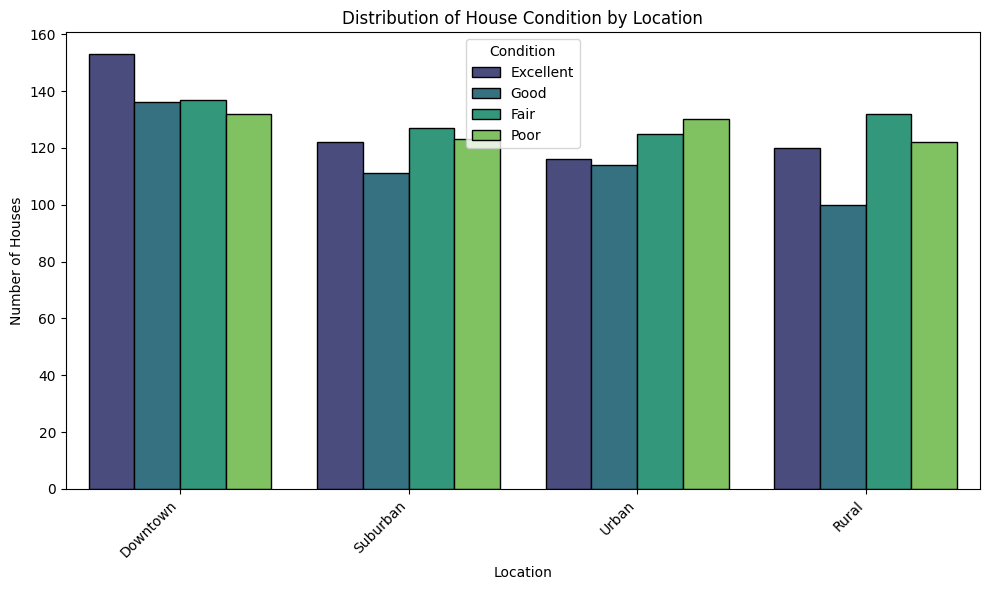

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Location', hue='Condition', palette='viridis',edgecolor='black')
plt.title('Distribution of House Condition by Location')
plt.xlabel('Location')
plt.ylabel('Number of Houses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-3317782045.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location', y='Price', data=df, palette='viridis')


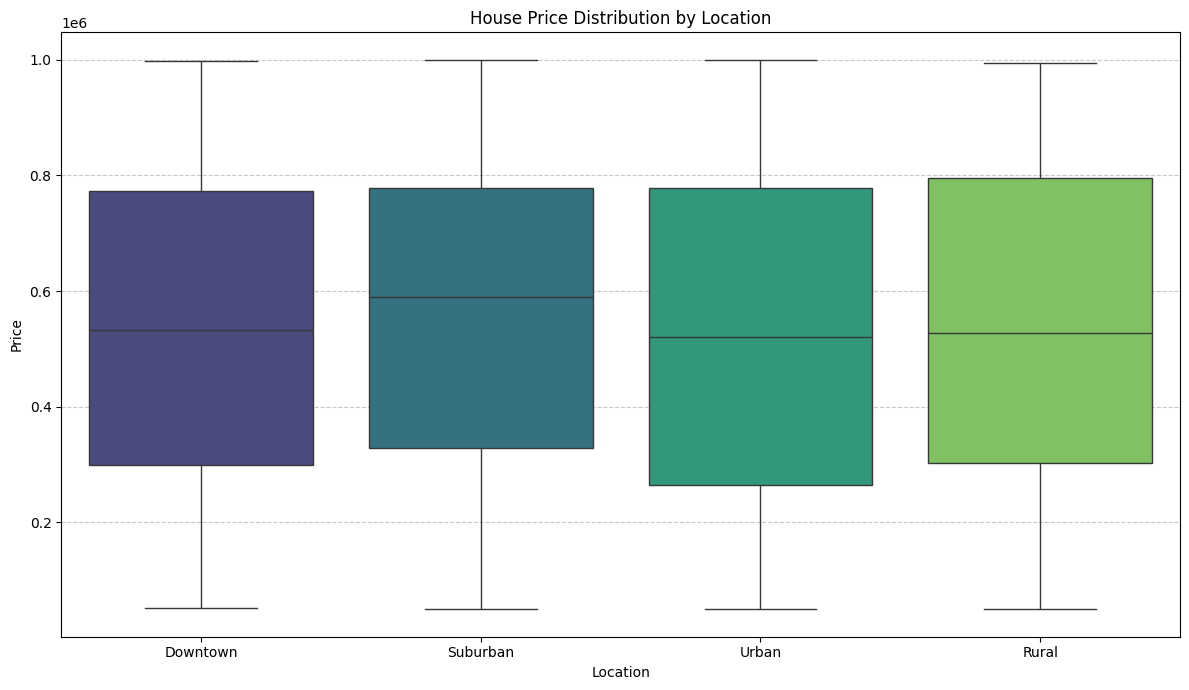

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 7))
sns.boxplot(x='Location', y='Price', data=df, palette='viridis')
plt.title('House Price Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Price')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [27]:
# MAE tells the avg difference between predicted
# and actual house prices
# we use this because its easy to understand, same unit as price,
# less sensitive to outliers(an outlier is a value that lies for await
#                            from the majority of values in the same col)

# MSE - its squsres the errors, so large mistakes are penalized more
# it highlights big prediction errors, used by many algorithms

# RMSE - it brings the error back to the original price unit , making
# it easier to connect or interpret,penalizes large errors, same unit
# comparing target_outdated

# r2 - R2 tells us how much of the variation in house prices is explained by the model


from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# the reason for using mae,mse,rmse,r2 is that we never judge a
# model by accurncy in linearRegression
# here we used error based metric

mae = mean_absolute_error(y_test,y_test_pred)
mse = mean_squared_error(y_test,y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_test_pred)

print('MAE:',mae)
print('MSE:',mse)
print('RMSE',rmse)
print('R2:',r2)

MAE: 243241.97758826384
MSE: 78321466146.0328
RMSE 279859.72583784326
R2: -0.006717808430749761


In [28]:
#r2
#0.0 - model except nothing
#1.0 - perfectmodel
#0.80 - model explines 80% of the vartion
#r2< - worse than  avg prediction


In [29]:
train_r2 = r2_score(y_train,y_train_pred)
test_r2 = r2_score(y_test,y_test_pred)

print('Train R2:',train_r2)
print('Test R2:',test_r2)

Train R2: 0.009856184863687889
Test R2: -0.006717808430749761


In [30]:
# Regularization (ridge and lasso)

# ridge regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(x_train_preprocessed, y_train)

y_train_pred_ridge = ridge.predict(x_train_preprocessed)
y_test_pred_ridge = ridge.predict(x_test_preprocessed)

In [31]:
from sklearn.metrics import r2_score

ridge_train_r2 = r2_score(y_train,y_train_pred_ridge)
ridge_test_r2 = r2_score(y_test,y_test_pred_ridge)

ridge_train_r2, ridge_test_r2

(0.009856156591055543, -0.006715935063532852)

In [32]:
# lasso regression
# ridge reduces the impact of useless features while lasso can completely
# eliminate useless features

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1,max_iter=10000)
lasso.fit(x_train_preprocessed, y_train)

y_train_pred_lasso = lasso.predict(x_train_preprocessed)
y_test_pred_lasso = lasso.predict(x_test_preprocessed)

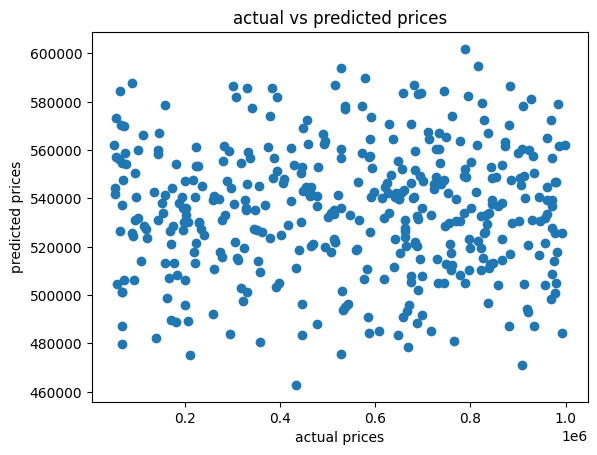

In [33]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(y_test,y_test_pred)
plt.xlabel("actual prices")
plt.ylabel("predicted prices")
plt.title("actual vs predicted prices")
plt.show()